In [133]:
from scipy import signal
import matplotlib.pyplot as plot
import numpy as np
def Gen_squ_wave(p_freq):
    (amp_scale,amp_shift) = (0.5,-0.5) #range -1 < p_wave < 0 
    n = np.linspace(0, 10, 1000, endpoint=True)
    shift_right = -((1/p_freq)*np.pi)
    d = 1-(1/p_freq)
    scale_wave = 2/p_freq #dip always 1 therefore duty
    cover_count = amp_scale*signal.square((scale_wave*np.pi*n)+shift_right, duty = d) + amp_shift
    # Plot the square wave
    plot.plot(n, cover_count)
    plot.xticks(range(0, int(max(n)), 1))
    # Give x,y,title axis label
    plot.xlabel('Whole Numbers')
    plot.ylabel('Amplitude')
    plot.title('Prime Wave Coverage')
    plot.axhline(y = 0, color = 'r')
    # Display
    plot.grid()
    plot.show()
    return (n, cover_count)



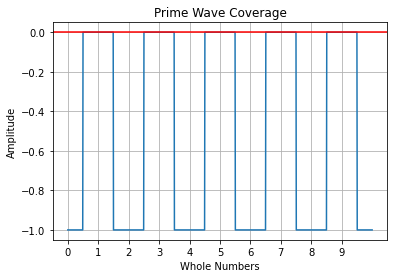

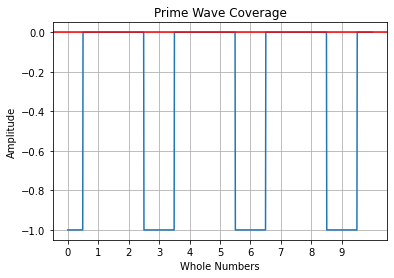

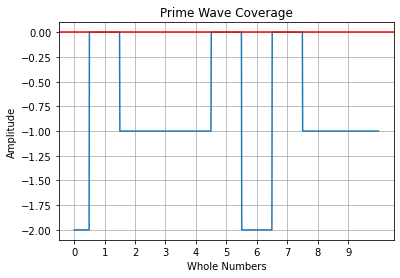

In [134]:
(n2, cover_count2) = Gen_squ_wave(2)
(n3, cover_count3) = Gen_squ_wave(3)
cover_count1 = cover_count3 + cover_count2
# Plot the square wave
plot.plot(n2, cover_count1)
plot.xticks(range(0, int(max(n2)), 1))
# Give x,y,title axis label
plot.xlabel('Whole Numbers')
plot.ylabel('Amplitude')
plot.title('Prime Wave Coverage')
plot.axhline(y = 0, color = 'r')
# Display
plot.grid()
plot.show()